# Convolution Matrix

In image processing, a convolution matrix is a matrix used for blurring, sharpening, embossing, edge detection etc.

## Create image

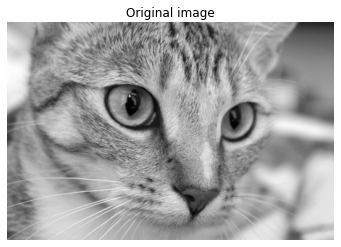

In [1]:
import numba
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color

# load cat image
original_img = skimage.img_as_float(skimage.color.rgb2gray(skimage.data.chelsea()))

# Draw cat image
plt.axis('off')
ax_img = plt.imshow(original_img)
ax_img.set_cmap('gray')
plt.title('Original image')
plt.show()

## Kernel matrices

Convolution matrices (also kernel matrices) are small matrices.

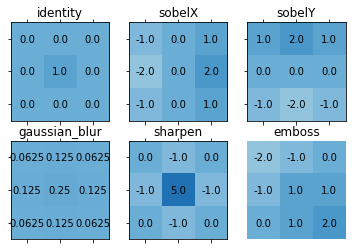

In [2]:
# Kernel matrices
identity= np.array([[0.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 0.0]])
sobelX = np.array([[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0], [-1.0, 0.0, 1.0]])
sobelY = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
gaussian_blur = np.array([[1.0, 2.0, 1.0], [2.0, 4.0, 2.0], [1.0, 2.0, 1.0]]) / 16
sharpen = np.array([[0.0, -1.0, 0.0], [-1.0, 5.0, -1.0], [0.0, -1.0, 0.0]])
emboss = np.array([[-2.0, -1.0, 0.0], [-1.0, 1.0, 1.0], [0.0, 1.0, 2.0]])
kernels = [identity, sobelX, sobelY, gaussian_blur, sharpen, emboss]
kernel_names = ['identity', 'sobelX', 'sobelY', 'gaussian_blur', 'sharpen', 'emboss']

# Display kernel matrices
fig, ax = plt.subplots(2, 3)
plt.axis('off')
for k in range(6):
    i = int(k/3)
    j = k%3
    kernel = kernels[k]
    ax[i,j].matshow(kernel, cmap='Blues', vmin=-10, vmax=10)
    for ii in range(3):
        for jj in range(3):
            c = kernel[jj, ii]
            ax[i,j].set_xticklabels('')
            ax[i,j].set_yticklabels('')
            ax[i,j].text(ii, jj, str(c), va='center', ha='center')
            ax[i,j].set_title(kernel_names[k])

plt.axis('off')
plt.show()

## Convolution

Convolution is the process of adding each pixel of an image to its nearby neighbours and weighting it with the kernel.

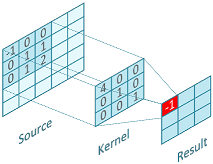

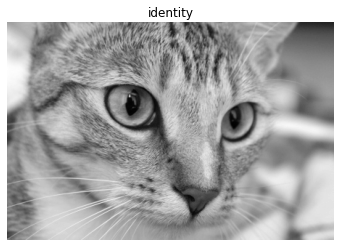

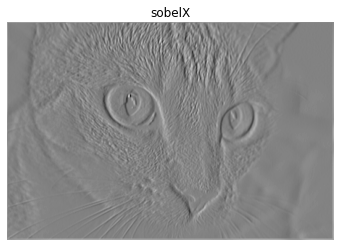

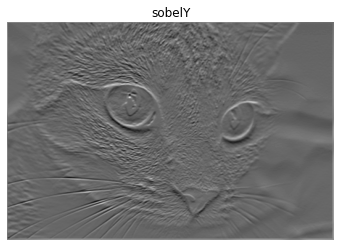

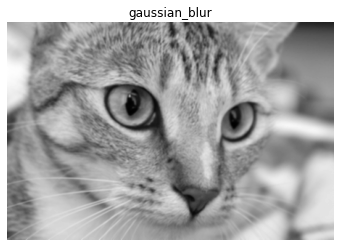

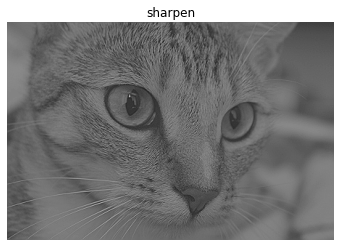

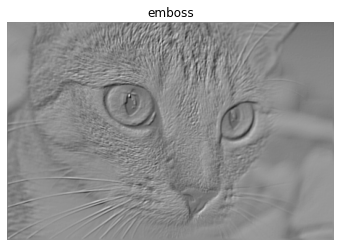

In [3]:
@numba.njit
def convolve(img, kernel):
    new_img = np.copy(img)
    # Image loop
    for i in range(1, img.shape[0]-2):
        for j in range(1, img.shape[1]-2):
            value = 0
            # Kernel loop
            for ki in range(-1, 2):
                for kj in range(-1, 2):
                    value += img[i+ki, j+kj] * kernel[ki+1, kj+1]
            new_img[i,j] = value
    return new_img

# Display convoluted images
for k in range(6):
    fig, ax = plt.subplots()
    plt.axis('off')
    kernel = kernels[k]
    image = convolve(original_img, kernel)
    ax_img = ax.imshow(image)
    ax_img.set_cmap('gray')
    ax.set_title(kernel_names[k])